<a href="https://colab.research.google.com/github/SimranAnand1/Data-and-Business-Analytics/blob/main/stocks_arima_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Price Prediction and Financial Analysis using Time Series Forecasting and ARIMA model**

In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 27.8 MB/s 
     |████████████████████████████████| 9.8 MB 47.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [3]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [4]:
Data = pd.read_csv("/content/TSLA.csv")

In [5]:
Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-03,703.799988,706.000000,680.500000,684.900024,684.900024,27043100
1,2021-05-04,678.940002,683.450012,657.700012,673.599976,673.599976,29739300
2,2021-05-05,681.059998,685.299988,667.340027,670.940002,670.940002,21901900
3,2021-05-06,680.760010,681.020020,650.000000,663.539978,663.539978,27784600
4,2021-05-07,665.799988,690.000000,660.219971,672.369995,672.369995,23469200
...,...,...,...,...,...,...,...
247,2022-04-25,978.969971,1008.619995,975.299988,998.020020,998.020020,22780400
248,2022-04-26,995.429993,1000.000000,875.000000,876.419983,876.419983,45377900
249,2022-04-27,898.580017,918.000000,877.359985,881.510010,881.510010,25652100
250,2022-04-28,899.979980,900.000000,821.700012,877.510010,877.510010,41649500


In [6]:
Data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
Data['Date'] = pd.to_datetime(Data['Date'])

In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [9]:
Data.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume
count,252,252.00,252.00,252.00,252.00,252.00,252.00
unique,252,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-05-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2021-05-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-04-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,848.37,867.02,828.37,847.59,847.59,24756626.59
std,NaN,178.63,184.71,170.25,177.39,177.39,8939625.30
min,NaN,552.55,566.21,546.98,563.46,563.46,9800600.00
25%,NaN,684.47,697.09,673.59,685.50,685.50,18679800.00


In [10]:
Data.isnull().values.sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb34cfa2150>,
      dtype=object)

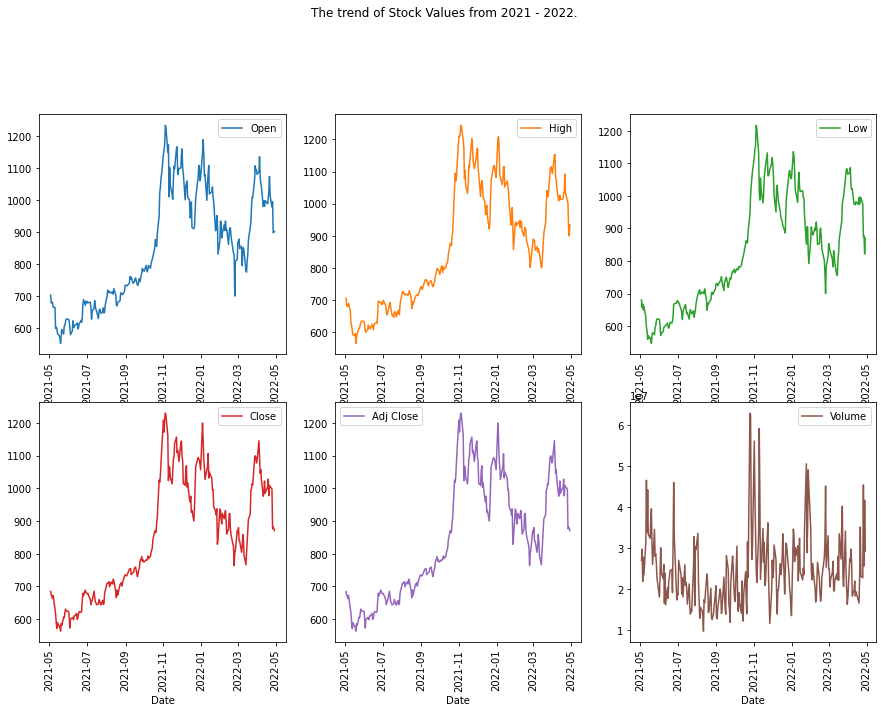

In [11]:
Column_List = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
# Plot
Data.plot(x = "Date", y = Column_List, subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "The trend of Stock Values from 2021 - 2022.", rot = 90)

In [12]:
import seaborn as sns

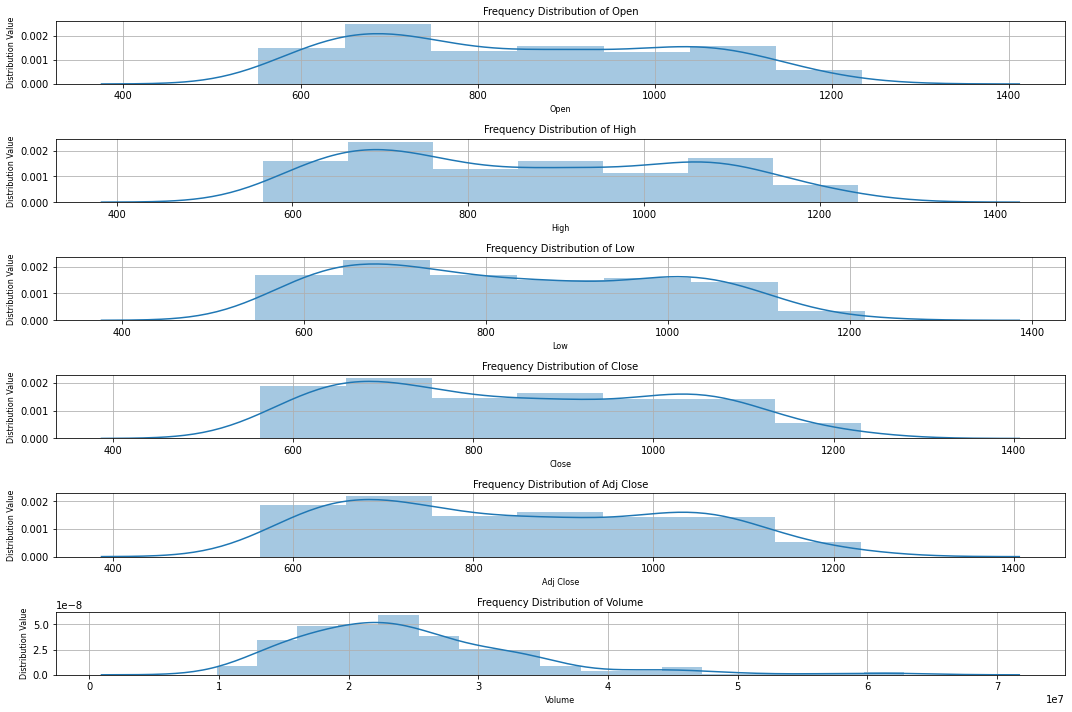

In [13]:
fig, ax = plt.subplots(len(Column_List), figsize = (15, 10))

for i, col_list in enumerate(Column_List):
    sns.distplot(Data[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) 
    ax[i].grid('on')

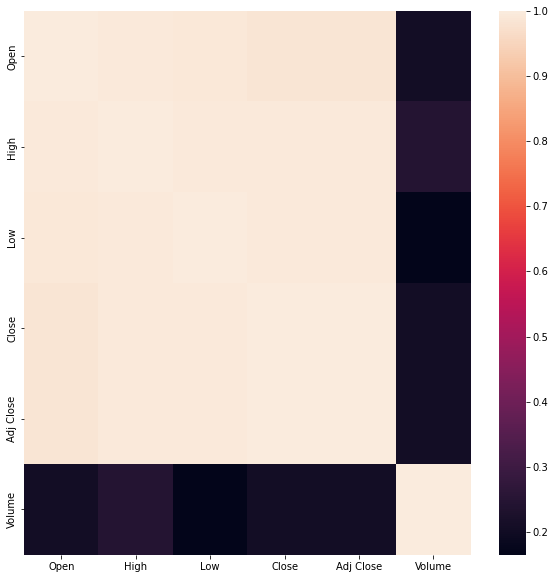

In [14]:
fig, ax = plt.subplots (figsize = (10, 10))
corr_matrix = Data.corr()
sns.heatmap(corr_matrix, xticklabels = corr_matrix.columns.values, yticklabels = corr_matrix.columns.values)

In [15]:
corr_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.00,1.00,0.99,0.99,0.99,0.21
High,1.00,1.00,0.99,0.99,0.99,0.24
Low,0.99,0.99,1.00,1.00,1.00,0.16
Close,0.99,0.99,1.00,1.00,1.00,0.21
Adj Close,0.99,0.99,1.00,1.00,1.00,0.21
Volume,0.21,0.24,0.16,0.21,0.21,1.00


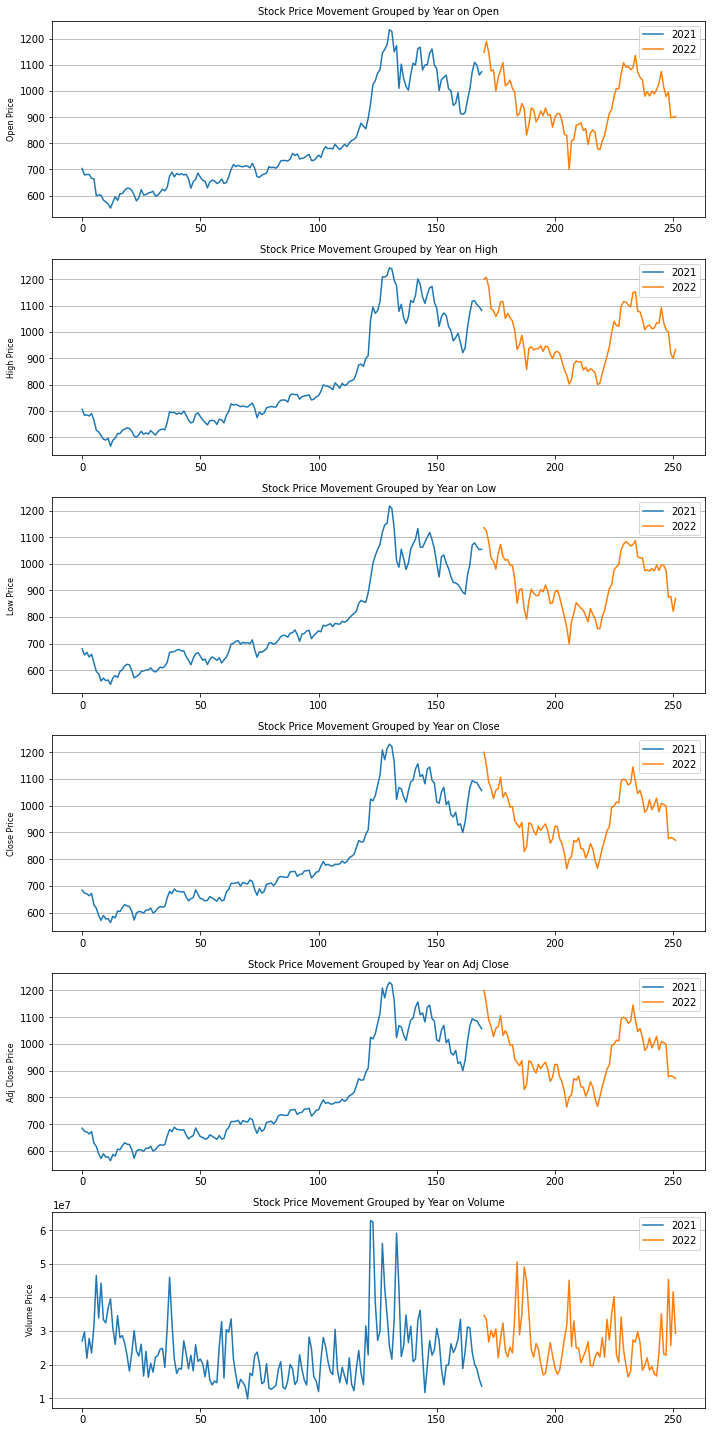

In [16]:
Data['Year'] = Data['Date'].dt.year
Data['Month'] = Data['Date'].dt.month
Data['WeekDay'] = Data['Date'].dt.weekday
fig, ax = plt.subplots(len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    Data.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True)

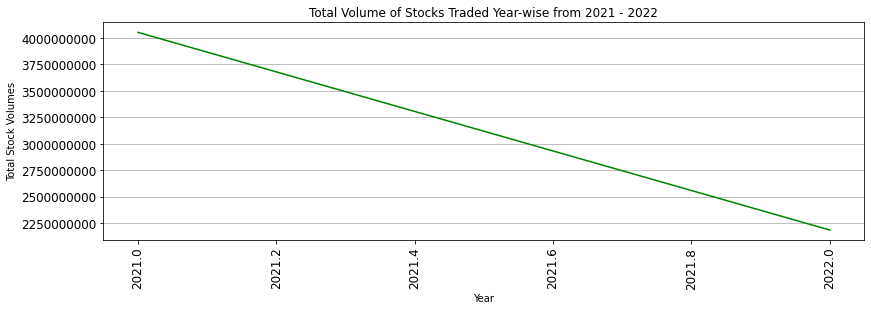

In [17]:
# Visualzing only the total volume of stocks traded grouped year-wise
check = Data.groupby('Year')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded Year-wise from 2021 - 2022", rot = 90, color = "green")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

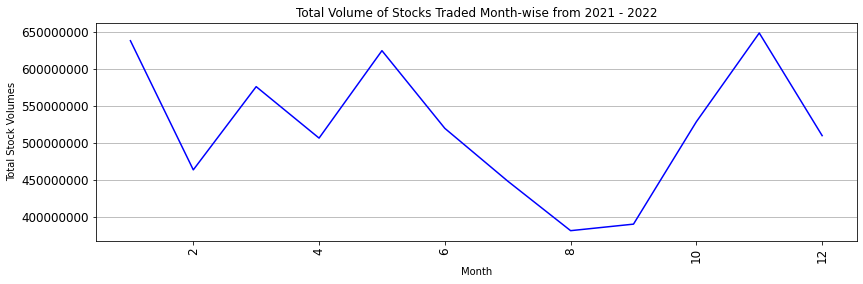

In [18]:
# Visualzing only the total volume of stocks traded grouped month-wise
check = Data.groupby('Month')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded Month-wise from 2021 - 2022", rot = 90, color = "blue")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)


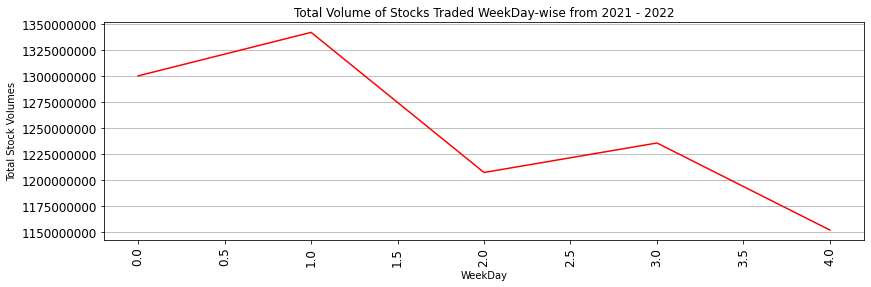

In [19]:
# Visualzing only the total volume of stocks traded grouped weekday-wise
check = Data.groupby('WeekDay')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded WeekDay-wise from 2021 - 2022", rot = 90, color = "red")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

EDA (Exploratory Data Analysis) yielded insights:

1) It is found that the stock volume trade spiked from **50** to around **200** from July (Both Opening, Closing and Total Volumes).

2) When viewed by Year, the spike **increased from June** through to 2022 thereby undergoing a **dip in January**.

3) When viewed monthwise, **January, June, July, August and September** showed extensive dip in stock trades whereas the other months showed substantial increase in trade.


Text(0.5, 1.0, 'Tesla Autocorrelation plot')

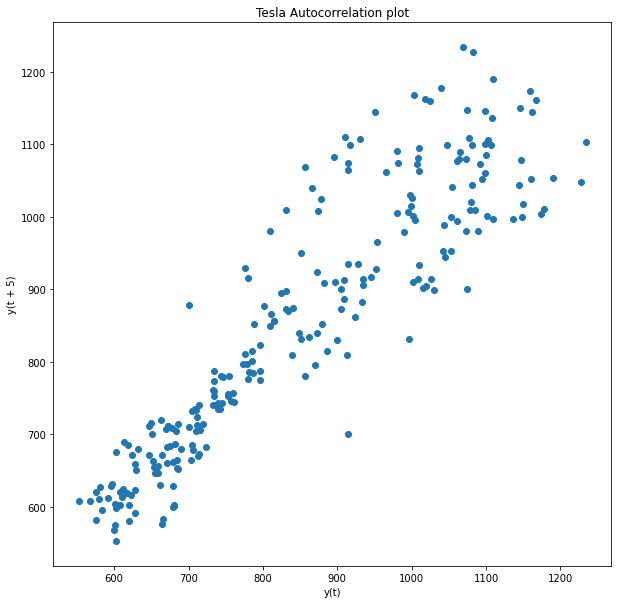

In [20]:
df = pd.read_csv("TSLA.csv").fillna(0)
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Tesla Autocorrelation plot')

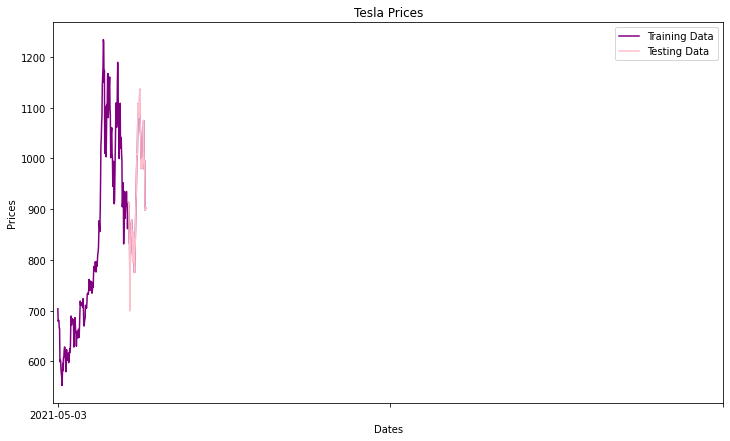

In [21]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'purple', label='Training Data')
plt.plot(test_data['Open'], 'pink', label='Testing Data')
plt.xticks(np.arange(0,1982, 950), df['Date'][0:1982:950])
plt.legend()

In [22]:
# SMAPE function (Symmetric mean absolute percentage error) as it is not currently supported in Scikit-learn as a loss function.
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

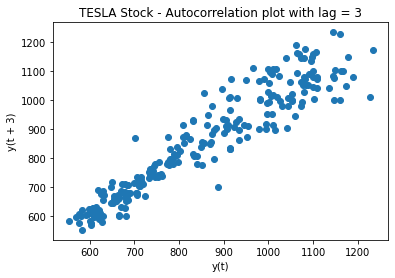

In [23]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
plt.show()

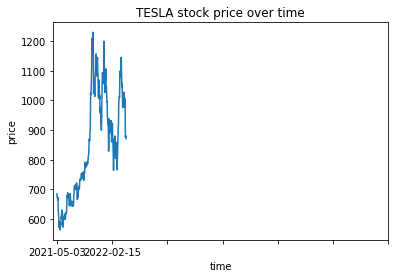

In [24]:
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,1259, 200), df['Date'][0:1259:200])
plt.title("TESLA stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [25]:

train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 1526.1982658826944


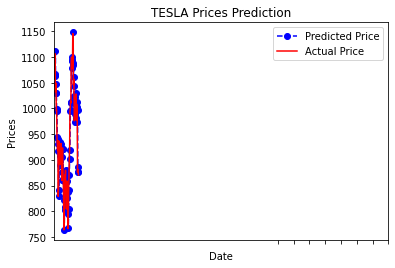

In [26]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()